In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/emotions-dataset/emotions.csv


In [52]:
dt = pd.read_csv('/kaggle/input/emotions-dataset/emotions.csv')
dt.head()


,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [53]:
dt["label"] = dt["label"].map({
    0: "sadness",
    1: "joy",
    2: "love",
    3: "anger",
    4: "fear",
    5: "surprise"
})


<Axes: xlabel='label', ylabel='count'>

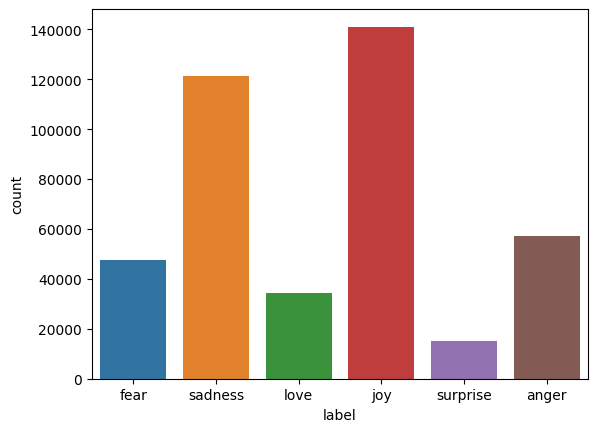

In [54]:
import seaborn as sns
sns.countplot(x='label',data=dt)

In [55]:
import re
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)   # remove handles
    text = re.sub(r'https?://\S+', '', text)     # remove URLs
    text = re.sub(r'#\w+', '', text)             # remove hashtags
    text = re.sub(r'[^\w\s]', '', text)          # remove punctuation
    text = text.lower().strip()                  # lowercase + trim
    return text


dt['text'] = dt['text'].apply(clean_text)


In [56]:
dt['text'].head()

0        i just feel really helpless and heavy hearted
1    ive enjoyed being able to slouch about relax a...
2    i gave up my internship with the dmrg and am f...
3                           i dont know i feel so lost
4    i am a kindergarten teacher and i am thoroughl...
Name: text, dtype: object

In [57]:
x = dt['text']
y = dt['label']
dt.isnull().sum()

text     0
label    0
dtype: int64

In [58]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [60]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])
pipe_lr.fit(x_train,y_train)
pipe_lr.score(x_test,y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8963076701614645

In [61]:
import joblib
pipeline_file = open("text_emotion.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()